This notebook contains code used to generate figures that are not from experimental results. 
These figures are used in, for instance, the paper and presentation slides.

In [28]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
#%config InlineBackend.figure_format = 'pdf'
import freqopttest.util as util
import freqopttest.data as data
import freqopttest.ex.exglobal as exglo
import freqopttest.kernel as kernel
import freqopttest.tst as tst
import freqopttest.glo as glo
import freqopttest.plot as plot
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import sys

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Plot simple 2d data

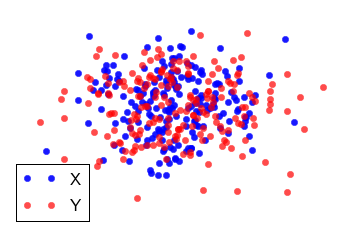

In [54]:
ss = data.SSGaussVarDiff(d=2)
sam = ss.sample(n=200, seed=7)
x, y = sam.xy()

plt.plot(x[:, 0], x[:, 1], 'ob', label='$\mathsf{X}$', alpha=0.9, markeredgecolor='b')
plt.plot(y[:, 0], y[:, 1], 'or', label='$\mathsf{Y}$', alpha=0.7, markeredgecolor='r')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.box(False)
plt.legend(loc='best')
plt.savefig('gvd_demo.pdf')

## Plot blobs dataset

In [30]:
# font options
font = {
    #'family' : 'normal',
    #'weight' : 'bold',
    'size'   : 14
}

plt.rc('font', **font)
plt.rc('lines', linewidth=2)

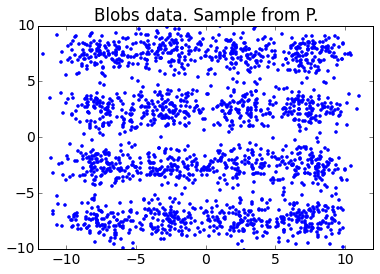

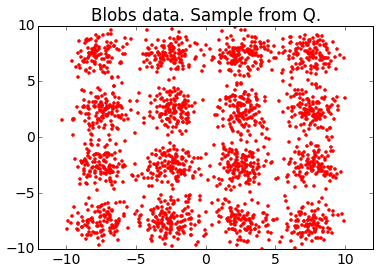

In [31]:
ss_blobs = data.SSBlobs()
sam = ss_blobs.sample(n=2000, seed=2)
bx, by = sam.xy()

plt.figure()
plt.plot(by[:, 0], by[:, 1], 'ob', markersize=3, markeredgecolor='b')
plt.xlim([-12, 12])
plt.ylim([-10, 10])
plt.title('Blobs data. Sample from P.')
plt.savefig('blobs_p.pdf')

plt.figure()
plt.plot(bx[:, 0], bx[:, 1], 'or', markersize=3, markeredgecolor='r')
plt.xlim([-12, 12])
plt.ylim([-10, 10])
plt.title('Blobs data. Sample from Q.')
plt.savefig('blobs_q.pdf')

## $H_0/H_1$ distributions

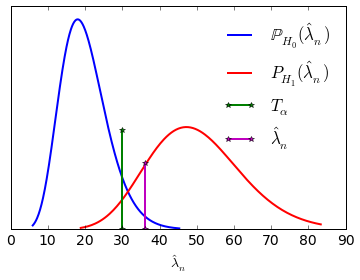

In [57]:
J = 20
alpha = 0.07

# plot the null distribution
h0_xmin = stats.chi2.ppf(0.001, J)
h0_xmax = stats.chi2.ppf(0.999, J)
domain = np.linspace(h0_xmin, h0_xmax, 400)
plt.plot(domain, stats.chi2.pdf(domain, J), 'b-', label='$\mathbb{P}_{H_0}(\hat{\lambda}_n)$')


# plot H1 distribution. Say a noncentral Chi2
# noncentrality parameter
nc = 30

h1_dom = np.linspace(stats.ncx2.ppf(0.001, J, nc), stats.ncx2.ppf(0.99, J, nc), 200)
plt.plot(h1_dom, stats.ncx2.pdf(h1_dom, J, nc), 'r-', label='$P_{H_1}(\hat{\lambda}_n)$')

# rejection threshold
thresh = stats.chi2.isf(alpha, J)
plt.plot([thresh, thresh], [0, stats.chi2.pdf(J, J)/2], '*g-', label='$T_\\alpha$', linewidth=2)

# actual test statistic
stat = 36
plt.plot([stat, stat], [0, stats.chi2.pdf(J, J)/3], 
         '*m-', label='$\hat{\lambda}_n$', linewidth=2)

# p-value
pval_x = np.linspace(stat, h0_xmax, 400)
pval_y = stats.chi2.pdf(pval_x, J)
#plt.fill_between(pval_x, np.zeros(len(pval_x)), pval_y, color='gray', alpha='0.5', label='a')

p1 = plt.Rectangle((0, 0), 1, 1, fc='gray')
#shade_leg = plt.legend([p1], ['p-val.'], loc='upper right', 
#                       bbox_to_anchor=(0.96, 0.53), frameon=False)
#plt.gca().add_artist(shade_leg)
plt.legend(loc='best', frameon=False)
plt.gca().get_yaxis().set_visible(False)
plt.xlabel('$\hat{\lambda}_n$')
plt.savefig('h0_demo.pdf')



## Test power highllight


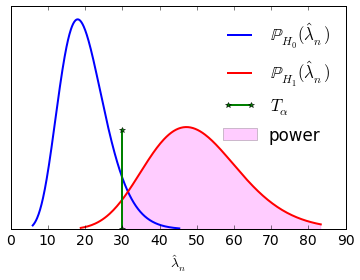

In [33]:
plt.plot(domain, stats.chi2.pdf(domain, J), 'b-', label='$\mathbb{P}_{H_0}(\hat{\lambda}_n)$')
plt.plot(h1_dom, stats.ncx2.pdf(h1_dom, J, nc), 'r-', label='$\mathbb{P}_{H_1}(\hat{\lambda}_n)$')
plt.plot([thresh, thresh], [0, stats.chi2.pdf(J, J)/2], '*g-', label='$T_\\alpha$', linewidth=2)
#plt.stem([stat], [stats.chi2.pdf(J, J)/3], 'om-', label='$\hat{\lambda}$')
# test power 
pow_x = np.linspace(thresh, max(h1_dom), 400)
pow_y = stats.ncx2.pdf(pow_x, J, nc)
plt.fill_between(pow_x, np.zeros(len(pow_x)), pow_y, color='magenta', alpha=0.2)

p2 = plt.Rectangle((0, 0), 1, 1, fc='magenta', alpha=0.2)
shade_pow = plt.legend([p2], ['power'], loc='upper right',
                       bbox_to_anchor=(0.97, 0.53), frameon=False)
plt.gca().add_artist(shade_pow)
plt.legend(loc='best', frameon=False)
plt.gca().get_yaxis().set_visible(False)
plt.xlabel('$\hat{\lambda}_n$')
plt.savefig('test_power_demo.pdf')

## Type-1 error

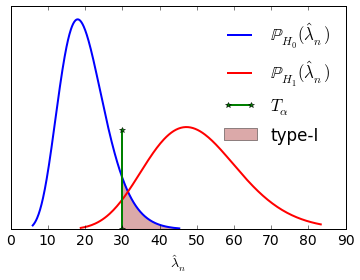

In [34]:
plt.plot(domain, stats.chi2.pdf(domain, J), 'b-', label='$\mathbb{P}_{H_0}(\hat{\lambda}_n)$')
plt.plot(h1_dom, stats.ncx2.pdf(h1_dom, J, nc), 'r-', label='$\mathbb{P}_{H_1}(\hat{\lambda}_n)$')
plt.plot([thresh, thresh], [0, stats.chi2.pdf(J, J)/2], '*g-', label='$T_\\alpha$', linewidth=2)
#plt.stem([stat], [stats.chi2.pdf(J, J)/3], 'om-', label='$\hat{\lambda}$')
# type-1 error
t1_x = np.linspace(thresh, max(domain), 400)
t1_y = stats.chi2.pdf(t1_x, J)
plt.fill_between(t1_x, np.zeros(len(t1_x)), t1_y, color='brown', alpha=0.4)

p2 = plt.Rectangle((0, 0), 1, 1, fc='brown', alpha=0.4)
shade_pow = plt.legend([p2], ['type-I'], loc='upper right', 
                       bbox_to_anchor=(0.96, 0.53), frameon=False)
plt.gca().add_artist(shade_pow)
plt.legend(loc='best', frameon=False)
plt.gca().get_yaxis().set_visible(False)
plt.xlabel('$\hat{\lambda}_n$')
plt.savefig('type1_error_demo.pdf')

## Noncentral chi-square / power

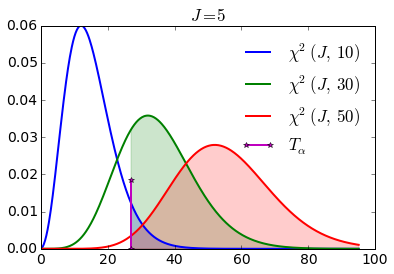

In [35]:
J = 5
dom = np.linspace(1e-5, 95, 500)
thresh = 27
ncs = [10, 30, 50]
pow_colors = ['blue', 'green', 'red']
for i, nc in enumerate(ncs):
    plt.plot(dom, stats.ncx2.pdf(dom, J, nc), label='$\chi^2(J, \, %.2g)$'%( nc),
            linewidth=2)
    # plot the test powers
    pow_dom = np.linspace(thresh, max(dom), 500)
    plt.fill_between(pow_dom, np.zeros(len(dom)), 
                     stats.ncx2.pdf(pow_dom, J, nc), color=pow_colors[i], alpha=0.2)
    
    
plt.plot([thresh, thresh], [0, stats.ncx2.pdf(ncs[0]+J, J, ncs[0])/3], 
         '*m-', label='$T_\\alpha$')
plt.legend(loc='best', frameon=False)
plt.title('$J = %d$'%J)
plt.savefig('ncx2_pow_inc.pdf')

## Visualize mean embeddings 

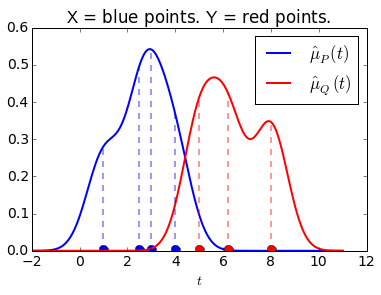

In [36]:
sigma2 = 1
def kgauss_me(Xte, X):
    """Inputs are 2d arrays"""
    kg = kernel.KGauss(sigma2=sigma2)
    K_dom_x = kg.eval(Xte, X)
    me_xte = np.mean(K_dom_x, 1)
    return me_xte
    
X = np.array([[1, 2.5, 3, 4]]).T
Y = np.array([[5, 6.2, 8]]).T
xy = np.vstack((X, Y))

dom = np.linspace(min(xy)-3*sigma2, max(xy)+3*sigma2, 300)
dom_mat = dom[:, np.newaxis]

me_x = kgauss_me(dom_mat, X)
me_y = kgauss_me(dom_mat, Y)

# plot mean embedding as a function

# data X
markersize = 9
#plt.figure(figsize=(7, 5))
plt.plot(X[:, 0], np.zeros(X.shape[0]) + 5e-3, 'ob', 
         markersize=markersize
        # , label='$\mathsf{X}$'
        )
# mu_x 
plt.plot(dom, me_x, 'b-', label='$\hat{\mu}_P(t)$')

# data Y
plt.plot(Y[:, 0], np.zeros(Y.shape[0]) + 5e-3, 'or', 
         markersize=markersize
        # , label='$\mathsf{Y}$'
        )
# mu_y
plt.plot(dom, me_y, 'r-', label='$\hat{\mu}_Q(t)$')

self_me_x = kgauss_me(X, X)
for i in range(X.shape[0]):
    plt.plot([X[i, 0], X[i, 0]], [0, self_me_x[i]], '--', color='blue', alpha=0.4)
self_me_y = kgauss_me(Y, Y)
for i in range(Y.shape[0]):
    plt.plot([Y[i, 0], Y[i, 0]], [0, self_me_y[i]], '--', color='red', alpha=0.4)
    
plt.xlabel('$t$')
plt.title('$\mathsf{X}$ = blue points. $\mathsf{Y}$ = red points.')
plt.legend(loc='best')
plt.savefig('mean_embeddings.pdf')

## ME test: interactive test locations

In [42]:
def t2_stat(X, Y, locs, gamma):
    """
    locs: J x d
    """
    tst_data = data.TSTData(X, Y)
    me = tst.MeanEmbeddingTest(locs, gamma, alpha=alpha)
    result = me.perform_test(tst_data)
    return result['test_stat']


alpha = 0.01    
# locations to test
ss = data.SSGaussMeanDiff(d=2, my=1.0)
#ss = data.SSGaussVarDiff(d=2)
#ss = data.SSBlobs()
n = 400
tst_data = ss.sample(n=n, seed=6)
#locs = tst.MeanEmbeddingTest.init_locs_2randn(tst_data, n_test_locs=2, seed=39)

X, Y = tst_data.xy()


In [39]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

def best_loc2_testpower(X, Y, gamma, loc1):
    """Show a heatmap of Lambda(T) on many locations of the test points. 
    J=2 (two locations). Assume loc1 is given. Vary loc2 (2d). """
    
    # For simplicity, we will assume that J=2 (two frequencies) 
    # and that one (loc1) is fixed. We will optimize loc2 (2-dimensional).
    XY = np.vstack((X,Y))
    max1, max2 = np.max(XY, 0)
    min1, min2 = np.min(XY, 0)
    #sd1, sd2 = np.std(XY, 0)
    sd1, sd2 = (0, 0)
    # form a frequency grid to try 
    nd1 = 30
    nd2 = 30
    loc1_cands = np.linspace(min1-sd1/2, max1+sd1/2, nd1)
    loc2_cands = np.linspace(min2-sd2/2, max2+sd2/2, nd2)
    lloc1, lloc2 = np.meshgrid(loc1_cands, loc2_cands)
    # nd2 x nd1 x 2
    loc3d = np.dstack((lloc1, lloc2))
    # #candidates x 2
    all_loc2s = np.reshape(loc3d, (-1, 2) )
    
    # all_locs = #candidates x J x 2
    all_locs = np.array( [np.vstack((c, loc1)) for c in all_loc2s] )

    # evaluate Lambda(T) on each candidate T on the grid. Size = (#candidates, )
    stat_grid = np.array([t2_stat(X, Y, T, gamma) for T in all_locs])
    stat_grid = np.reshape(stat_grid, (nd2, nd1) )
    
    #ax = fig.gca(projection='3d')
    #ax.plot_surface(lloc1, lloc2, stat_grid, rstride=8, cstride=8, alpha=0.3)
    #cset = ax.contourf(lloc1, lloc2, stat_grid, zdir='z', offset=0, cmap=cm.coolwarm)
    plt.figure(figsize=(10, 6))
    plt.contourf(lloc1, lloc2, stat_grid, alpha=0.3)
    plt.colorbar()

    max_stat = np.max(stat_grid)
    #plt.xlabel('')
    #plt.ylabel('')
    plt.title('Fixed $t_1$. Plot $t_2 \mapsto \hat{\lambda}_n(t_1, t_2)$')
    #ax.view_init(elev=max_stat*2, azim=90)

    loc1x, loc1y = loc1
    # plot the data
    #plt.figure(figsize=(12, 4))
    plt.plot(X[:, 0], X[:, 1], 'ob', label='$\mathsf{X}$', 
             markeredgecolor='b', markersize=5, alpha=0.9)
    plt.plot(Y[:, 0], Y[:, 1], 'or', label='$\mathsf{Y}$', 
             markeredgecolor='r', markersize=5, alpha=0.9)
    plt.plot(loc1x, loc1y, '^k', markersize=20, label='$t_1$')
    plt.legend()
    #plt.savefig('lambda_t2_surface.pdf')


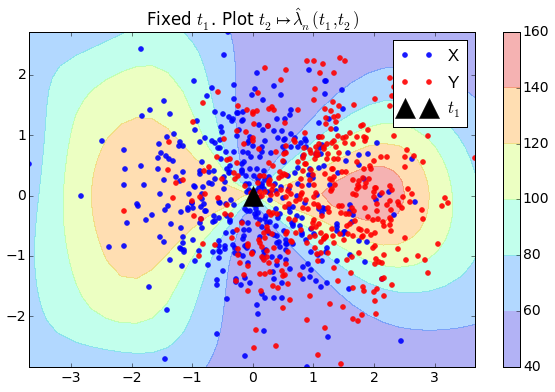

In [40]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
from IPython.display import display
import ipywidgets as widgets

# interactively select test locations
def me_test_plot_interact(X, Y, loc1x=0, loc1y=0, gamma=1):
    #locs = np.array([[loc1x, loc1y], [loc2x, loc2y]])
    
    # compute the test statistic
    loc1 = np.array([loc1x, loc1y])
    best_loc2_testpower(X, Y, gamma, loc1)

loc1_bnd = (-5, 5, 0.2)
vs = interactive(me_test_plot_interact, X=fixed(X), Y=fixed(Y), loc1x=loc1_bnd, 
        loc1y=loc1_bnd, gamma=(0.1, 10, 0.2));
display(vs)